In [53]:
!pip install scipy

In [54]:
!pip install researchpy

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset

In [2]:
bike_sharing_data = pd.read_csv('datasets/day.csv')

bike_sharing_data.shape

(731, 16)

In [3]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bike_sharing_data = bike_sharing_data[['season', 
                                       'mnth', 
                                       'holiday', 
                                       'workingday', 
                                       'weathersit', 
                                       'temp',
                                       'cnt']]

In [5]:
bike_sharing_data.to_csv('datasets/bike_sharing_data_processed.csv', index=False)

In [6]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [7]:
bike_sharing_data['season'].unique()

array([1, 2, 3, 4])

In [8]:
bike_sharing_data['workingday'].unique()

array([0, 1])

In [9]:
bike_sharing_data['holiday'].unique()

array([0, 1])

In [10]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3])

In [11]:
bike_sharing_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [12]:
bike_sharing_data.shape

(731, 7)

In [13]:
bike_sharing_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


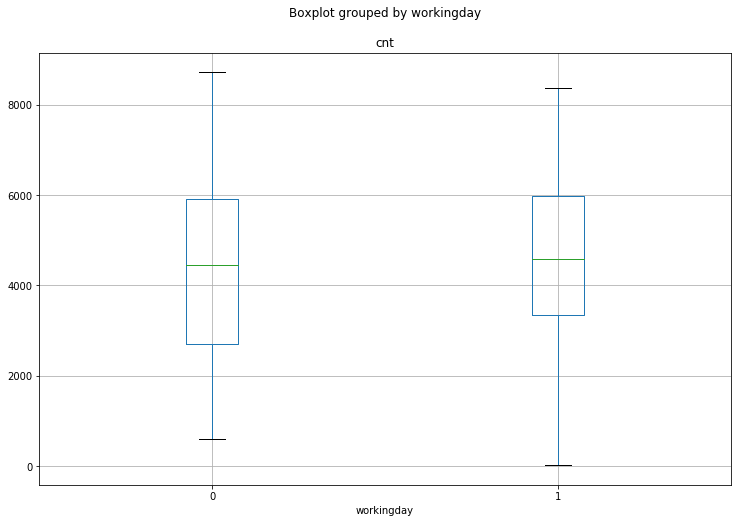

In [14]:
bike_sharing_data.boxplot(column=['cnt'], by='workingday', figsize=(12, 8))

In [15]:
sample_01 = bike_sharing_data[(bike_sharing_data['workingday'] == 1)]

sample_02 = bike_sharing_data[(bike_sharing_data['workingday'] == 0)]

In [16]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [17]:
sample_01 = sample_01.sample(231)

sample_01.shape, sample_02.shape

((231, 7), (231, 7))

## The hypothesis being tested

* __Null hypothesis (H0): u1 = u2, which translates to the mean of `sample_01` is equal to the mean of `sample 02`__
* __Alternative hypothesis (H1): u1 ? u2, which translates to the means of `sample01` is not equal to `sample 02`__

### Homogeneity of variance
Of these tests, the most common assessment for homogeneity of variance is Levene's test. The Levene's test uses an F-test to test the null hypothesis that the variance is equal across groups. A p value less than .05 indicates a violation of the assumption.

https://en.wikipedia.org/wiki/Levene%27s_test

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html

To know, [Click here](https://en.wikipedia.org/wiki/Levene%27s_test) why we test for levene's test?

In [18]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=0.7938672930650592, pvalue=0.373399079715542)

## Normal distribution  of residuals

### Checking difference between two pair points

https://pythonfordatascience.org/independent-t-test-python/

(array([ 3.,  5., 19., 40., 32., 41., 44., 24., 15.,  8.]),
 array([-2.7190355 , -2.21244298, -1.70585045, -1.19925793, -0.6926654 ,
        -0.18607288,  0.32051964,  0.82711217,  1.33370469,  1.84029722,
         2.34688974]),
 <a list of 10 Patch objects>)

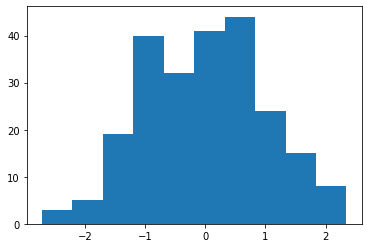

In [19]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt'], dtype=np.float))

plt.hist(diff)

### Checking for normality by Q-Q plot graph

https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/

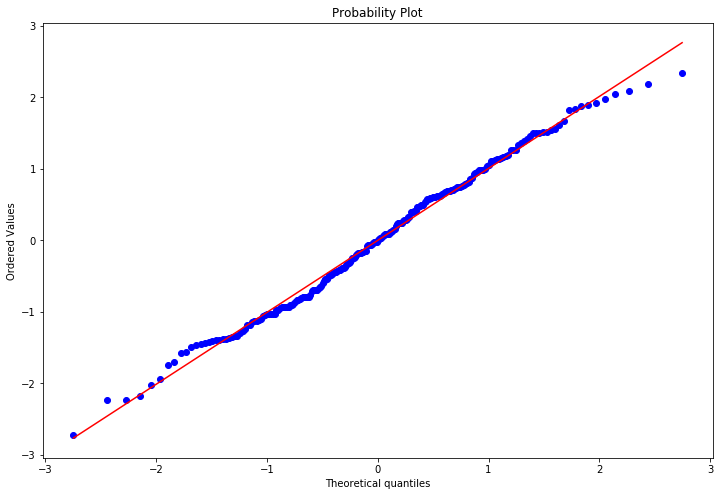

In [20]:
plt.figure(figsize=(12, 8))

stats.probplot(diff, plot=plt, dist='norm')

plt.show()

### Checking normal distribution by `shapiro method`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://stats.stackexchange.com/questions/15696/interpretation-of-shapiro-wilk-test

In [21]:
stats.shapiro(diff)

(0.9915695786476135, 0.2052171230316162)

__Note:-__[See here](https://stats.stackexchange.com/questions/15696/interpretation-of-shapiro-wilk-test)

W test statistic and the second value is the p-value. Since the test statistic does not produce a significant p-value, the data is indicated to be normally distributed

The data met all the assumptions for the t-test which indicates the results can be trusted and the t-test is an appropriate test to be used.

### Independent t-test by using `scipy.stats`

In [22]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=1.4798378333553206, pvalue=0.13960104478008933)

### Independent t-test using `researchpy`

https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [23]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'])

In [24]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4605.376623,1943.695197,127.885755,4353.399257,4857.353990
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4467.772727,2001.231657,93.105723,4284.808510,4650.736945


In [25]:
print(results)

          Independent t-test   results
0  Difference (cnt - cnt) =   275.2078
1      Degrees of freedom =   460.0000
2                       t =     1.4798
3   Two side test p value =     0.1396
4  Difference > 0 p value =     0.9302
5  Difference < 0 p value =     0.0698
6               Cohen's d =     0.1377
7               Hedge's g =     0.1375
8           Glass's delta =     0.1416
9                       r =     0.0688


In [26]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


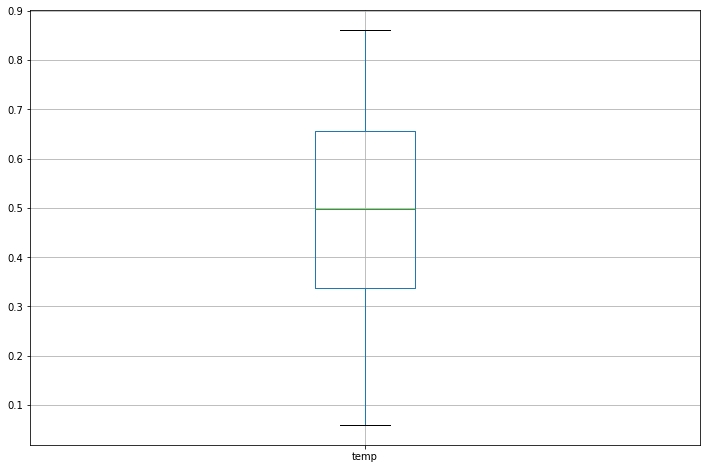

In [27]:
bike_sharing_data[['temp']].boxplot(figsize=(12, 8))

In [28]:
bike_sharing_data['temp_category'] = \
    bike_sharing_data['temp'] > bike_sharing_data['temp'].mean()

In [29]:
bike_sharing_data.sample(10)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
611,3,9,1,0,1,0.707500,6034,True
91,2,4,0,0,2,0.315000,2252,False
139,2,5,0,1,1,0.536667,4917,True
452,2,3,0,1,1,0.484167,5698,False
578,3,8,0,1,1,0.717500,7580,True
59,1,3,0,1,1,0.266667,1851,False
11,1,1,0,1,1,0.172727,1162,False
409,1,2,0,1,2,0.319167,3922,False
313,4,11,0,1,2,0.380000,2933,False
526,2,6,0,0,1,0.726667,6598,True


In [30]:
bike_sharing_data.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


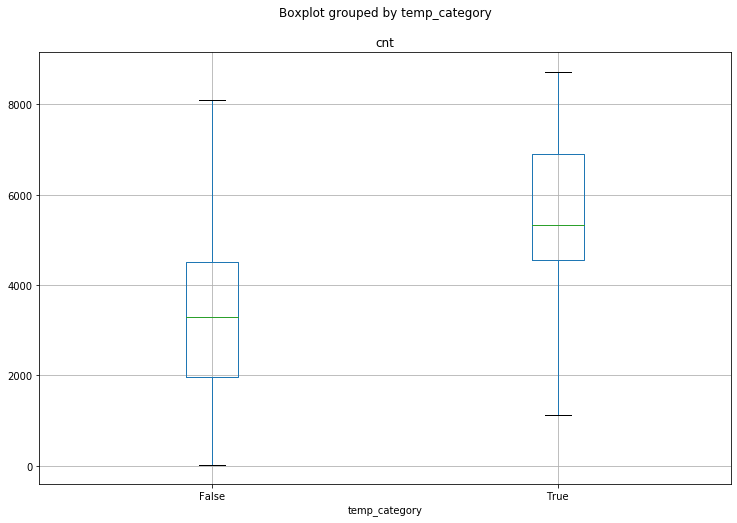

In [31]:
bike_sharing_data.boxplot(column=['cnt'], by='temp_category', figsize=(12, 8))

In [32]:
sample_01 = bike_sharing_data[(bike_sharing_data['temp_category'] == True)]

sample_02 = bike_sharing_data[(bike_sharing_data['temp_category'] == False)]

In [33]:
sample_01.shape, sample_02.shape

((367, 8), (364, 8))

In [34]:
sample_01 = sample_01.sample(364)

sample_01.shape, sample_02.shape

((364, 8), (364, 8))

In [35]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=4.764856128120302, pvalue=0.029366139828848118)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(array([ 3.,  7., 23., 38., 42., 77., 66., 61., 31., 16.]),
 array([-2.98621179, -2.47323075, -1.96024971, -1.44726867, -0.93428763,
        -0.42130659,  0.09167446,  0.6046555 ,  1.11763654,  1.63061758,
         2.14359862]),
 <a list of 10 Patch objects>)

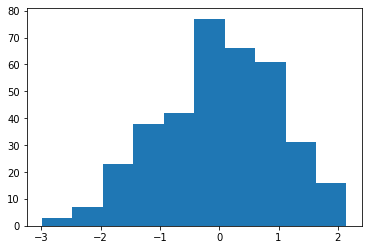

In [36]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt']))
plt.hist(diff)

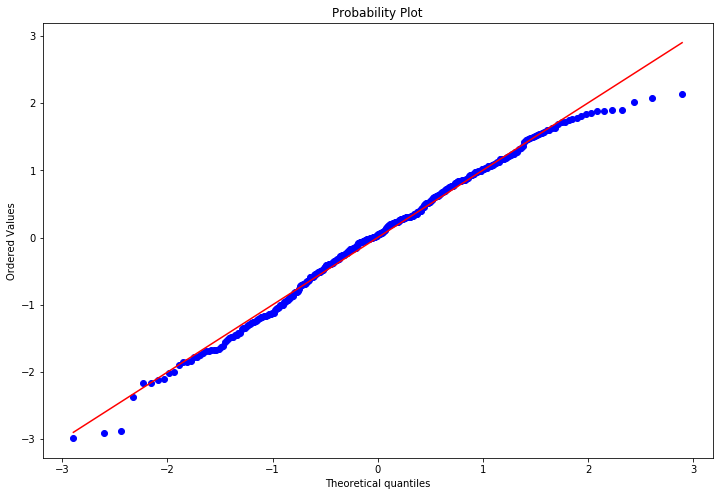

In [37]:
plt.figure(figsize=(12, 8))
stats.probplot(diff, plot=plt)
plt.show()

In [38]:
stats.shapiro(diff)

(0.9902293086051941, 0.016001803800463676)

In [39]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=18.91228492137341, pvalue=3.6520043264314993e-65)

In [43]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'], equal_variances=False)

In [44]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5612.442308,1475.309364,77.327222,5460.376730,5764.507885
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4500.053571,1937.583806,71.811634,4359.070644,4641.036499


In [45]:
print(results)

              Welch's t-test    results
0  Difference (cnt - cnt) =   2224.7775
1      Degrees of freedom =    712.8521
2                       t =     18.9123
3   Two side test p value =      0.0000
4  Difference > 0 p value =      1.0000
5  Difference < 0 p value =      0.0000
6               Cohen's d =      1.4019
7               Hedge's g =      1.4004
8           Glass's delta =      1.5080
9                       r =      0.5780
